# Project 04:Write a Data Science Blog Post

## Importing the three datasets.

In [1]:
import pandas as pd
import numpy as np

from sklearn import model_selection 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import the movies dataset as a csv separated by ::. Also, asigning the colums with the approperiate titles
movies = pd.read_csv('movies.dat', sep = '::',header = None ,engine='python',
                    names = ['MovieID','Title','Genres'])
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
# import the users dataset as a csv separated by ::. Also, asigning the colums with the approperiate titles
users = pd.read_csv('users.dat', sep = '::',header = None ,engine='python',
                   names = ['UserID','Gender','Age','Occupation','Zip-code'])
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [4]:
# import the ratings dataset as a csv separated by ::. Also, asigning the colums with the approperiate titles 
ratings = pd.read_csv('ratings.dat', sep = '::',header = None ,engine='python',
                   names = ['UserID','MovieID','Rating','Timestamp'])
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


## Creating a new dataset [Master_Data].

In [5]:
# Merging the datasets together using pandas merge comand. After that I had to drop 
# the unwanted  columns and rearrange the rest of them.
M1 = pd.merge(users, ratings, on = 'UserID', how = 'inner')
M2 = pd.merge(movies,M1, on = 'MovieID', how = 'inner')
Master_Data = M2[['MovieID','Title','UserID','Age','Gender','Occupation','Rating']]
Master_Data.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,1,Toy Story (1995),1,1,F,10,5
1,1,Toy Story (1995),6,50,F,9,4
2,1,Toy Story (1995),8,25,M,12,4
3,1,Toy Story (1995),9,25,M,17,5
4,1,Toy Story (1995),10,35,F,1,5


## Exploring the data

In [6]:
Master_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 7 columns):
MovieID       1000209 non-null int64
Title         1000209 non-null object
UserID        1000209 non-null int64
Age           1000209 non-null int64
Gender        1000209 non-null object
Occupation    1000209 non-null int64
Rating        1000209 non-null int64
dtypes: int64(5), object(2)
memory usage: 61.0+ MB


In [7]:
Master_Data.describe()

,MovieID,UserID,Age,Occupation,Rating
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,1.865540e+03,3.024512e+03,2.973831e+01,8.036138e+00,3.581564e+00
std,1.096041e+03,1.728413e+03,1.175198e+01,6.531336e+00,1.117102e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,1.030000e+03,1.506000e+03,2.500000e+01,2.000000e+00,3.000000e+00
50%,1.835000e+03,3.070000e+03,2.500000e+01,7.000000e+00,4.000000e+00
75%,2.770000e+03,4.476000e+03,3.500000e+01,1.400000e+01,4.000000e+00
max,3.952000e+03,6.040000e+03,5.600000e+01,2.000000e+01,5.000000e+00


### User Age Distribution

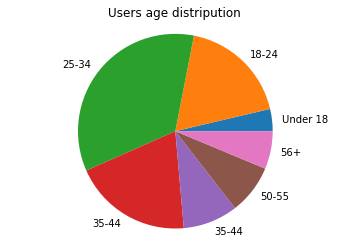

In [8]:
#To show the users age distubution, first we need to count the number of users in each age group 
# then plot it using a pie chart
Slices = users.groupby('Age').count()
Slices = list(Slices['UserID'])
Labels = "Under 18","18-24","25-34","35-44","35-44","50-55","56+"
plt.pie(Slices, labels = Labels)
plt.title("Users age distripution")
plt.axis('equal')
plt.show()
# We can see that around half of the users are between 18-34

### User rating of the movie “Toy Story”

Text(0.5, 0, 'Rating')

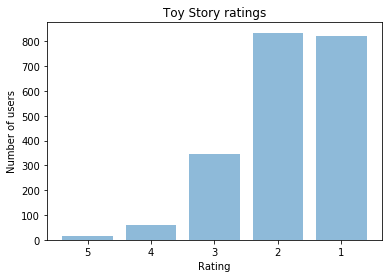

In [9]:
# The movie toy story has ID 1 (I chose toy story 1995).
# I'll start by converting the ID to an index then store only the ratings with index 1 in 
# the new dataframe.
# Then I counted each rating to classify it in order to plot in as a bar plot.
# I selected the bar plot since it is a catagorical data. 
Toy_story_ratings = ratings[['MovieID','Rating','UserID']].sort_values(by = ['MovieID']).set_index(['MovieID'])
Toy_story_ratings = Toy_story_ratings.loc['1']
TSR_bars = Toy_story_ratings.groupby('Rating').count()
TSR_bars = list(TSR_bars['UserID'])
labels = ('5','4','3','2','1')
index = np.arange(len(labels))
plt.title("Toy Story ratings")
plt.bar(index, TSR_bars, align='center', alpha=0.5)
plt.xticks(index, labels)
plt.ylabel('Number of users')
plt.xlabel('Rating')

### Top 25 movies by viewership rating

In [10]:
Avg_ratings_x = pd.DataFrame(Master_Data.groupby('MovieID')['Rating'].mean().sort_values(ascending=False))
Top25_x = Avg_ratings_x.head(25)  
Top25_x = pd.DataFrame(Top25_x)
Top25_x = pd.merge(movies,Top25_x, on = 'MovieID', how = 'inner')
Top25_x = Top25_x[['MovieID','Title','Rating']].sort_values(by = 'Rating',ascending=False)
# there is an issue here that the highest rating does not contain popular movies but they 
# recieved high rating from fewer number of users which resulted in high average rating.

There is an issue here that the highest rating does not contain popular movies but they recieved high rating from fewer number of users which resulted in high average rating.

In [11]:
ratings_per_movie = pd.DataFrame(Master_Data.groupby('MovieID')['Rating'].count().
                                 sort_values(ascending=False))
ratings_per_movie.reset_index(inplace=True)
ratings_per_movie = ratings_per_movie.rename(columns = {'Rating': 'Rating Count'})
print ('Highest number of ratings:', Master_Data.groupby('MovieID')['Rating'].count().max())
print ('Lowest number of ratings:', Master_Data.groupby('MovieID')['Rating'].count().min())

Highest number of ratings: 3428
Lowest number of ratings: 1


Based on the analysis above I'll consider only the movies with ratings count of more than 1000 this is the criteria of population that I selected.

In [12]:
Pop_movies = ratings_per_movie[ratings_per_movie['Rating Count']>=1000]
Pop_movies = pd.merge(Pop_movies, Avg_ratings_x, on = 'MovieID', how = 'inner')
Top25 = Pop_movies.sort_values(by = 'Rating',ascending=False).head(25)
Top25 = pd.merge(Top25,movies, on = 'MovieID', how = 'inner')
Top25 = Top25[['MovieID','Title','Rating','Rating Count']]
Top25

,MovieID,Title,Rating,Rating Count
0,318,"Shawshank Redemption, The (1994)",4.554558,2227
1,858,"Godfather, The (1972)",4.524966,2223
2,50,"Usual Suspects, The (1995)",4.517106,1783
3,527,Schindler's List (1993),4.510417,2304
4,1198,Raiders of the Lost Ark (1981),4.477725,2514
5,904,Rear Window (1954),4.476190,1050
6,260,Star Wars: Episode IV - A New Hope (1977),4.453694,2991
7,750,Dr. Strangelove or: How I Learned to Stop Worr...,4.449890,1367
8,912,Casablanca (1942),4.412822,1669
9,2762,"Sixth Sense, The (1999)",4.406263,2459


We can see here that the results are better now sense the highest ratings is for a popular movie with a high number of ratings.

## Feature Engineering
### All the unique genres

In [13]:
Genres = movies['Genres']
genres_unique = pd.DataFrame(Genres.str.split(pat = "|").tolist()).stack().unique()
genres_unique

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

### Creating a separate column for each genre category

In [14]:
# Here I used the pandas get_dummied to create the table.
Movie_genres = movies[['MovieID','Genres']]
Movie_genres_Cleaned = Movie_genres.set_index('MovieID').Genres.str.split('|', expand=True).stack()
#cleaned = data.set_index('title')
Movie_genres = pd.get_dummies(Movie_genres_Cleaned).groupby(level=0).sum()
Master_Data1 = pd.merge(Master_Data, Movie_genres, on = 'MovieID')
Master_Data1.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating,Action,Adventure,Animation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1,1,F,10,5,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,Toy Story (1995),6,50,F,9,4,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,Toy Story (1995),8,25,M,12,4,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,Toy Story (1995),9,25,M,17,5,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,Toy Story (1995),10,35,F,1,5,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Selecting the features that affect the rating


The age, gender and occupation along with the genre of the movie will effect the rating. For example a teenage male would probably give an action movie high rating compared to an older female user. This is why I selected them as features.

In [15]:
X_feature_0 = Master_Data1[['Age','Gender','Occupation','Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western']]
Y_target = Master_Data1[['Rating']]
X_feature_0.head()

,Age,Gender,Occupation,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,...,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,1,F,10,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,50,F,9,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,25,M,12,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,25,M,17,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,35,F,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Creating a model to predict the movie rating

This is to convert the gender to a numeric value to use the linear regression model.

In [16]:
def Gender(gender):
    if gender == 'M':
        return 0
    if gender == 'F':
        return 1
    else:
        return gender

In [17]:
X_feature = X_feature_0.applymap(Gender)
X_feature.head()

,Age,Gender,Occupation,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,...,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,1,1,10,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,50,1,9,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,25,0,12,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,25,0,17,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,35,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X_feature, Y_target)

In [19]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((750156, 21), (250053, 21), (750156, 1), (250053, 1))

In [20]:
lineReg = LinearRegression()
lineReg.fit(X_train, Y_train)
y_pred_lineReg = lineReg.predict(X_test)

In [21]:
logReg = LogisticRegression()
logReg.fit(X_train, Y_train)
y_pred_logReg = logReg.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [22]:
print ('The MSE for the Linear Regression model: ', 
       np.sqrt(metrics.mean_squared_error(Y_test,y_pred_lineReg)))
print ('The MSE for the Logistic Regression model: ', 
       np.sqrt(metrics.mean_squared_error(Y_test,y_pred_logReg)))

The MSE for the Linear Regression model:  1.093904960638479
The MSE for the Logistic Regression model:  1.1939052781186699


I tested both the linear and logistic regression to select the best one. Based on the MSE values, the linear regression is better than the logistic regression.

actual:  [[5]
 [3]
 [4]
 [5]
 [1]
 [4]
 [3]
 [2]
 [5]
 [3]
 [4]
 [5]
 [3]
 [3]
 [5]
 [3]
 [5]
 [2]
 [3]
 [3]
 [3]
 [4]
 [4]
 [2]
 [5]
 [2]
 [4]
 [2]
 [1]
 [3]]
predicted:  [[3.77704538]
 [3.68722561]
 [3.43028378]
 [3.21251276]
 [3.33405963]
 [3.75459716]
 [3.73571834]
 [3.16040671]
 [3.75492476]
 [3.68295657]
 [3.49841474]
 [3.4270431 ]
 [3.75393576]
 [3.85023584]
 [3.45856599]
 [3.63081296]
 [4.06550165]
 [3.74704213]
 [3.16831873]
 [3.82020435]
 [3.45991724]
 [3.50629998]
 [3.46806675]
 [3.71435914]
 [3.3497223 ]
 [3.5328243 ]
 [3.50519144]
 [3.70842513]
 [3.78197815]
 [3.6985605 ]]
